In [1]:
# show images inline
%matplotlib inline

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

# import keras
import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box
from keras_retinanet.utils.colors import label_color

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time

# set tf backend to allow memory to grow, instead of claiming everything
import tensorflow as tf


Using TensorFlow backend.


In [8]:
def draw_caption(image, box, caption):
    """ Draws a caption above the box in an image.

    # Arguments
        image   : The image to draw on.
        box     : A list of 4 elements (x1, y1, x2, y2).
        caption : String containing the text to draw.
    """

    b = np.array(box).astype(int)
    cv2.putText(image, caption, (b[0], b[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4)
    cv2.putText(image, caption, (b[0], b[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4)

In [3]:
model_path = os.path.join('snapshots', 'resnet50_csv_final30_inference.h5')
model = models.load_model(model_path, backbone_name='resnet50')


Instructions for updating:
Colocations handled automatically by placer.


c:\users\sravuri\anaconda3\lib\site-packages\keras\engine\saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [4]:
labels_to_names = {0: 'speed limit 20 (prohibitory)',
1 : 'speed limit 30 (prohibitory)',
2 : 'speed limit 50 (prohibitory)',
3 : 'speed limit 60 (prohibitory)',
4 : 'speed limit 70 (prohibitory)',
5 : 'speed limit 80 (prohibitory)',
6 : 'restriction ends 80 (other)',
7 : 'speed limit 100 (prohibitory)',
8 : 'speed limit 120 (prohibitory)',
9 : 'no overtaking (prohibitory)',
10 :'no overtaking (trucks) (prohibitory)',
11 : 'priority at next intersection (danger)',
12 :' priority road (other)',
13 : 'give way (other)',
14 : 'stop (other)',
15 : 'no traffic both ways (prohibitory)',
16 : 'no trucks (prohibitory)',
17 : 'no entry (other)',
18 : 'danger (danger)',
19 : 'bend left (danger)',
20 : 'bend right (danger)',
21 : 'bend (danger)',
22 : 'uneven road (danger)',
23 : 'slippery road (danger)',
24 : 'road narrows (danger)',
25 : 'construction (danger)',
26 : 'traffic signal (danger)',
27 : 'pedestrian crossing (danger)',
28 : 'school crossing (danger)',
29 : 'cycles crossing (danger)',
30 : 'snow (danger)',
31 : 'animals (danger)',
32 : 'restriction ends (other)',
33 : 'go right (mandatory)',
34 : 'go left (mandatory)',
35 : 'go straight (mandatory)',
36 : 'go right or straight (mandatory)',
37 : 'go left or straight (mandatory)',
38 : 'keep right (mandatory)',
39 : ' keep left (mandatory)',
40 : 'roundabout (mandatory)',
41 : 'restriction ends (overtaking) (other)',
42 : 'restriction ends (overtaking (trucks)) (other)'}


processing time:  3.179499864578247
give way (other) 0.625


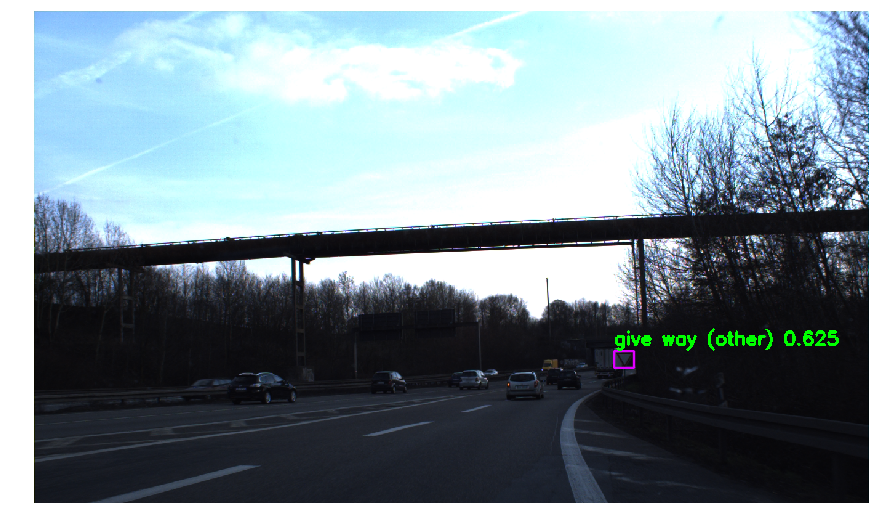

In [56]:
image = read_image_bgr('FullIJCNN2013/00421.ppm')

# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image)

# process image
start = time.time()
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
print("processing time: ", time.time() - start)

# correct for image scale
boxes /= scale

# visualize detections
for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can break
    if score < 0.35:
        break
        
    color = label_color(label)
    
    b = box.astype(int)
    draw_box(draw, b, color=color)
    
    caption = "{} {:.3f}".format(labels_to_names[label], score)
    draw_caption(draw, b, caption)
    print(caption)
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(draw)
plt.show()

processing time:  3.2213563919067383
give way (other) 0.734
keep right (mandatory) 0.630


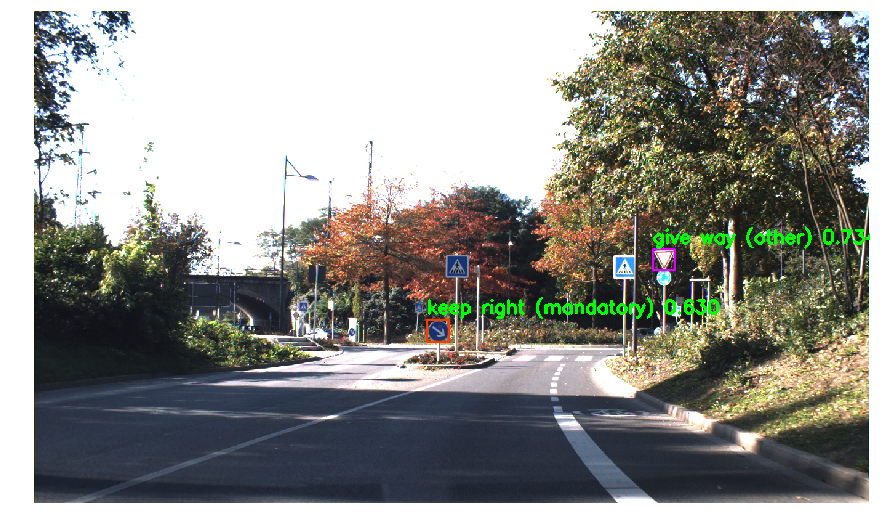

In [59]:
image = read_image_bgr('FullIJCNN2013/00675.ppm')

# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image)

# process image
start = time.time()
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
print("processing time: ", time.time() - start)

# correct for image scale
boxes /= scale

# visualize detections
for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can break
    if score < 0.50:
        break
        
    color = label_color(label)
    
    b = box.astype(int)
    draw_box(draw, b, color=color)
    
    caption = "{} {:.3f}".format(labels_to_names[label], score)
    draw_caption(draw, b, caption)
    print(caption)
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(draw)
plt.show()